3.1 Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)
Objective:
Explore the HDI dataset for the latest available year (2022) to practice basic EDA techniques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Human_Development_Index_Dataset.csv', encoding='latin1')


1. Extract Latest Year:
• Identify unique years in the dataset.


In [2]:
unique_years = df['year'].unique()
print(unique_years)


[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


• Filter the dataset to include only observations from the year 2022.
• Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).

In [3]:
hdi_2022_df = df[df['year'] == 2022]


2. Data Exploration:
• Display the first 10 rows of the 2022 dataset.

In [4]:
hdi_2022_df.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


• Count the number of rows and columns.

In [5]:
rows, columns = hdi_2022_df.shape
print("Rows:", rows)
print("Columns:", columns)


Rows: 206
Columns: 30


• List all column names and their data types.

In [6]:
hdi_2022_df.dtypes

Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
labour_participation_f_%     float64
l

3. Missing Values & Data Cleaning:
• Check for missing values in each column and report total counts.

In [7]:
null_values_df = hdi_2022_df.isna().sum()
print("Columns and their number of null values : ")
print(null_values_df)
     

Columns and their number of null values : 
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    

• Inspect dataset for:
 – numeric columns stored as text,
 – inconsistent or misspelled country names,
 – duplicate rows,
 – special characters (e.g., “–”) representing missing data.

 – numeric columns stored as text,

In [8]:
text_columns = hdi_2022_df.select_dtypes(include='object').columns
text_columns


Index(['iso3', 'country'], dtype='object')

 – inconsistent or misspelled country names,

In [9]:
unique_countries = hdi_2022_df['country'].unique()
print(unique_countries)
print(f"Total unique countries: {len(unique_countries)}")



['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo (Democratic Republic of the)' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong, China (SAR)' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republi

In [10]:
hdi_2022_df.duplicated().sum()

np.int64(0)

In [11]:
hdi_2022_df = hdi_2022_df.drop_duplicates()

In [12]:
hdi_2022_df.isin(['-']).sum()


Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f            0
expec_yr_school_m            0
mean_yr_school               0
mean_yr_school_f             0
mean_yr_school_m             0
gross_inc_percap             0
gross_inc_percap_f           0
gross_inc_percap_m           0
gender_development           0
gender_inequality            0
secondary_education_f_%      0
secondary_education_m_%      0
seats_in_parliament_f_%      0
seats_in_parliament_m_%      0
labour_participation_f_%     0
labour_participation_m_%     0
co2_emission_tons            0
mat_footprint_percap_tons    0
dtype: int64

In [13]:
hdi_2022_df.isnull().sum()

Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64

In [14]:
numeric_columns = hdi_2022_df.select_dtypes(include='number').columns

for column in numeric_columns:
    median_value = hdi_2022_df[column].median()
    hdi_2022_df[column] = hdi_2022_df[column].fillna(median_value)
hdi_2022_df.isnull().sum()
#Missing values in numeric columns were filled with each column’s median. This preserves all rows and reduces the effect of extreme values, making it suitable for socio-economic indicators.

Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f            0
expec_yr_school_m            0
mean_yr_school               0
mean_yr_school_f             0
mean_yr_school_m             0
gross_inc_percap             0
gross_inc_percap_f           0
gross_inc_percap_m           0
gender_development           0
gender_inequality            0
secondary_education_f_%      0
secondary_education_m_%      0
seats_in_parliament_f_%      0
seats_in_parliament_m_%      0
labour_participation_f_%     0
labour_participation_m_%     0
co2_emission_tons            0
mat_footprint_percap_tons    0
dtype: int64

4. Basic Statistics:
• Compute the mean, median, and standard deviation of HDI for the year 2022.
• Identify the country with the highest HDI in 2022.
• Identify the country with the lowest HDI in 2022.

In [15]:
hdi_2022_df[numeric_columns]['hdi'].agg(['mean', 'median', 'std'])


mean      0.723049
median    0.739500
std       0.152289
Name: hdi, dtype: float64

In [16]:
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), 'country']


'Switzerland'

In [17]:
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), 'country']


'Somalia'

5. Filtering and Sorting:
• Filter countries with HDI {"hdi"} greater than 0.800.
• Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
descending order.
• Display the top 10 countries.

In [18]:
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
high_hdi_sorted = high_hdi_df.sort_values(by='gross_inc_percap', ascending=False)
high_hdi_sorted[['country', 'hdi', 'gross_inc_percap']].head(10)

,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


6. Adding HDI Category Column:
• Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP):

HDI Category HDI Range (hdi)
Low < 0.550
Medium 0.550 – 0.699
High 0.700 – 0.799
Very ≥ 0.800

After creating this new column:
• verify that all countries are classified correctly,
• ensure the updated dataframe includes the new category column.
• Save the final dataframe as HDI category added.csv and include this file in your final
submission.

In [19]:

def classify_hdi(hdi):
    if hdi < 0.550:
        return 'Low'
    elif hdi < 0.700:
        return 'Medium'
    elif hdi < 0.800:
        return 'High'
    else:
        return 'Very High'

hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(classify_hdi)
hdi_2022_df['HDI Category'].value_counts()

hdi_2022_df.to_csv('HDI_category_added.csv', index=False)
hdi_2022_df[['country', 'hdi', 'HDI Category']].head(10)

,country,hdi,HDI Category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very High
164,Angola,0.591,Medium
197,Antigua and Barbuda,0.826,Very High
230,Argentina,0.849,Very High
263,Armenia,0.786,High
296,Australia,0.946,Very High
329,Austria,0.926,Very High


3.2 Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)
Objective:
Analyze multi-year HDI patterns (2020, 2021, and 2022) to explore temporal changes, regional differences,
and trends across countries.
Tasks:
Complete all the Following Tasks:

1. Data Extraction and Saving:
• Filter the dataset to include only the years 2020, 2021, and 2022.
• Save the filtered dataset as HDI problem1B.csv.
• Use this cleaned dataset for all subsequent tasks in Problem 1B.

In [20]:
years = [2020, 2021, 2022]
hdi_1B_df = df[df['year'].isin(years)]
hdi_1B_df.to_csv("HDI_problem1B.csv", index=False)
hdi_1B_df.shape

(618, 30)

2. Data Cleaning:
• Check for missing values in the following essential columns:
– hdi
– country
– year

In [21]:
hdi_1B_df[['hdi', 'country', 'year']].isnull().sum()

hdi        8
country    0
year       0
dtype: int64

In [22]:
hdi_1B_df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic of the)', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini (Kingdom of)', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
     

In [23]:
hdi_1B_df.duplicated().sum()


np.int64(0)

In [24]:
hdi_1B_df.dtypes

Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
labour_participation_f_%     float64
l

• Apply and justify cleaning steps, including:
– handling missing values (dropping or imputing),
– converting data types appropriately,
– removing duplicate entries,
– ensuring consistent naming conventions for countries and years.

In [25]:
hdi_1B_df = hdi_1B_df.dropna(subset=['hdi'])

In [26]:
non_countries = [
    'World',
    'Arab States',
    'South Asia',
    'Sub-Saharan Africa',
    'Europe and Central Asia',
    'East Asia and the Pacific',
    'Latin America and the Caribbean',
    'Very high human development',
    'High human development',
    'Medium human development',
    'Low human development'
]

hdi_1B_df = hdi_1B_df[~hdi_1B_df['country'].isin(non_countries)]


In [27]:
hdi_1B_df = hdi_1B_df.drop_duplicates()

In [28]:
hdi_1B_df[['hdi']].dtypes


hdi    float64
dtype: object

3. Visualization Tasks:
• A. Line Chart — HDI Trend (Country-Level):
– Select any five countries (or five countries from a region of your choice).
– Plot HDI values for each country across the years 2020, 2021, and 2022.
– Ensure the chart includes appropriate axis labels, a legend, and an informative caption.

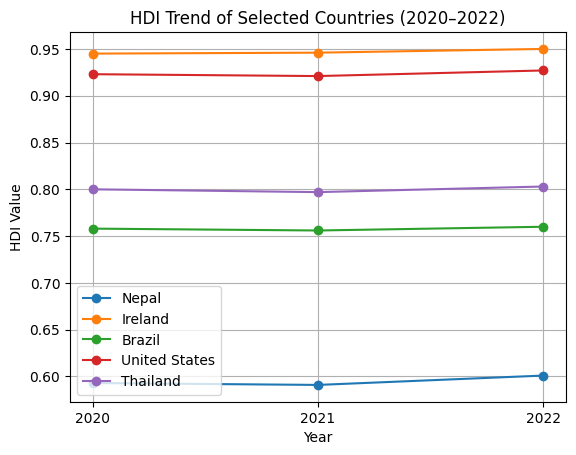

In [29]:
countries = ['Nepal', 'Ireland', 'Brazil', 'United States', 'Thailand']
plot_df = hdi_1B_df[hdi_1B_df['country'].isin(countries)]
for country in countries:
    data = plot_df[plot_df['country'] == country]
    plt.plot(data['year'], data['hdi'], marker='o', label=country)

plt.xlabel("Year")
plt.ylabel("HDI Value")
plt.title("HDI Trend of Selected Countries (2020–2022)")
plt.xticks([2020, 2021, 2022])
plt.legend()
plt.grid(True)
plt.show()

• B. Generate Visualizations:
– Bar Chart: Average HDI by Region (2020–2022)
∗ Group the dataset by Region and Year.
∗ Compute the mean HDI for each region-year pair.
∗ Plot a bar chart comparing average HDI across regions for each year.
∗ Label axes clearly and include a descriptive title.

Regional HDI comparison could not be performed because the dataset does not include a region variable

– Box Plot: HDI Distribution for 2020, 2021, and 2022
∗ Filter the dataset for the years 2020, 2021, and 2022.
∗ Create a box plot showing HDI spread for each of the three years.
∗ Include titles and axis labels.
∗ Comment briefly on distribution differences.

<Figure size 640x480 with 0 Axes>

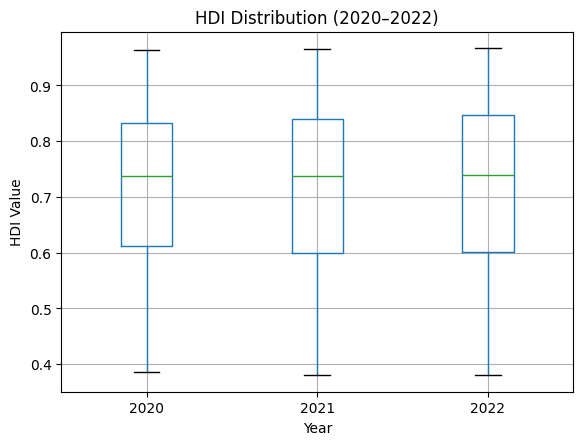

In [30]:
box_df = hdi_1B_df[hdi_1B_df['year'].isin([2020, 2021, 2022])]

plt.figure()
box_df.boxplot(column='hdi', by='year')
plt.xlabel("Year")
plt.ylabel("HDI Value")
plt.title("HDI Distribution (2020–2022)")
plt.suptitle("")
plt.show()



The box plot shows that median HDI values increases slightly over time.
The spread of HDI values remains similar across the three years which indicates consistent inequality levels between countries.

C

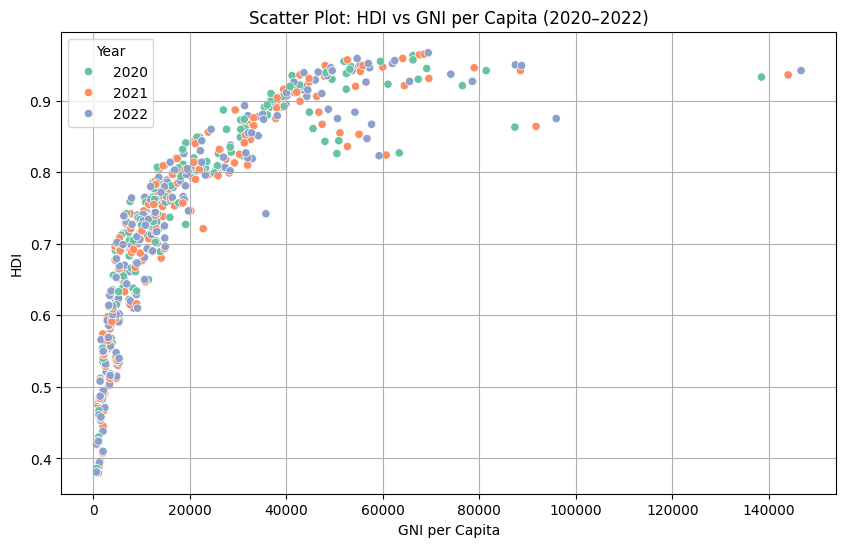

In [31]:
scatter_df = hdi_1B_df[hdi_1B_df['year'].isin([2020, 2021, 2022])]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_df, x='gross_inc_percap', y='hdi', hue='year', palette='Set2')
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Scatter Plot: HDI vs GNI per Capita (2020–2022)")
plt.grid(True)
plt.legend(title='Year')
plt.show()

The scatter plot demonstrates a positive correlation between income and human development by showing that nations with higher GNI per capita typically have higher HDI values. While some lower-income nations have lower HDIs, the majority of nations cluster in the mid-to-high HDI range. The HDI values from 2020 to 2022 were comparatively steady, with only little gains for some nations, according to the year-wise colours.

4. Short Analysis Questions:
• Which countries show the greatest improvement in HDI from 2020 to 2022?
• Did any countries experience a decline in HDI? Provide possible reasons.
• Which region has the highest and lowest average HDI across these three years?
• Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.

4 Problem 2
Advanced HDI Exploration
Objective:

Perform advanced analysis of HDI data, focusing on South Asian countries, composite metrics, outlier detec-
tion, metric relationships, and gap analysis.

Tasks:
Complete all the following tasks:
1. Create South Asia Subset:
• Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].
• Filter the HDI dataset to include only these countries.
• Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.

In [50]:
south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asia_df = hdi_1B_df[hdi_1B_df['country'].isin(south_asia)].copy()
south_asia_df.shape
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)

2. Composite Development Score:
• Create a new metric called Composite Score using the formula:

Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap"
• Rank South Asian countries based on Composite Score.
• Plot the top 5 countries in a horizontal bar chart.
• Compare the ranking of countries by Composite Score with their HDI ranking and discuss any
differences.

In [51]:
south_asia_df = south_asia_df.copy()
le_min = south_asia_df['life_expectancy'].min()
le_max = south_asia_df['life_expectancy'].max()
south_asia_df.loc[:, 'life_exp_index'] = (south_asia_df['life_expectancy'] - le_min)/ (le_max - le_min)

gni_min = south_asia_df['gross_inc_percap'].min()
gni_max = south_asia_df['gross_inc_percap'].max()
south_asia_df.loc[:, 'gni_index'] = (south_asia_df['gross_inc_percap'] - gni_min)/ (gni_max - gni_min)     

In [52]:
south_asia_df.loc[:, 'composite_score'] = (0.30 * south_asia_df['life_exp_index'] + 0.30 * south_asia_df['gni_index'])
south_asia_2022 = south_asia_df[south_asia_df['year'] == 2022]
composite_ranking = south_asia_2022.sort_values(by='composite_score', ascending=False)
composite_ranking[['country', 'composite_score']]

,country,composite_score
3530,Maldives,0.600000
5477,Sri Lanka,0.413702
659,Bhutan,0.322168
461,Bangladesh,0.275064
2573,India,0.187868
4091,Nepal,0.181350
4388,Pakistan,0.139975
32,Afghanistan,0.014271


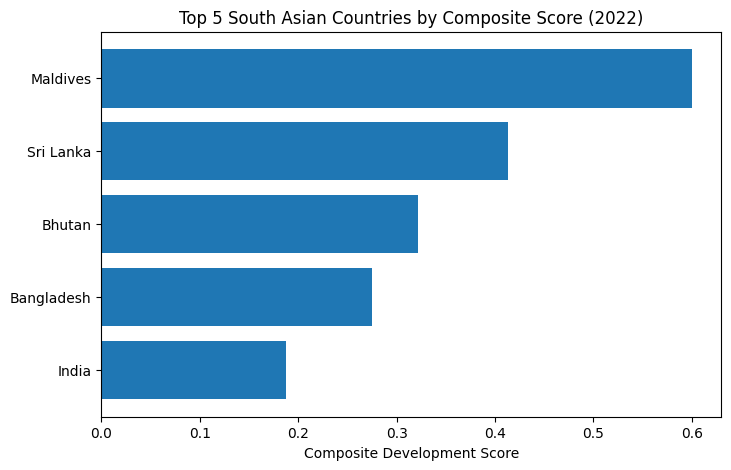

In [53]:
top5 = composite_ranking.head(5)

plt.figure(figsize=(8, 5))
plt.barh(top5['country'], top5['composite_score'])
plt.xlabel("Composite Development Score")
plt.title("Top 5 South Asian Countries by Composite Score (2022)")
plt.gca().invert_yaxis()
plt.show()

In [54]:
comparison = south_asia_2022.sort_values(by='hdi', ascending=False)[['country', 'hdi', 'composite_score']]
print(comparison)

          country    hdi  composite_score
5477    Sri Lanka  0.780         0.413702
3530     Maldives  0.762         0.600000
659        Bhutan  0.681         0.322168
461    Bangladesh  0.670         0.275064
2573        India  0.644         0.187868
4091        Nepal  0.601         0.181350
4388     Pakistan  0.540         0.139975
32    Afghanistan  0.462         0.014271


When comparing HDI and Composite Score rankings, we can see that most countries are ranked in a similar way. However, some differences appear because the Composite Score does not include education as a factor. For example, Maldives ranks highest in Composite Score mainly due to its high income per capita, while Sri Lanka ranks highest in HDI because it performs better in education. This shows that country rankings can change depending on which development indicators are considered.

3. Outlier Detection:
• Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.
• Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.
• Discuss why the identified countries stand out as outliers.

In [55]:
def detect_outliers(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
    
  return(series < lower_bound) | (series > upper_bound)

In [56]:
south_asia_2022 = south_asia_df[south_asia_df['year'] == 2022].copy()
south_asia_2022['hdi_outlier'] = detect_outliers(south_asia_2022['hdi'])
south_asia_2022['gni_outlier'] = detect_outliers(south_asia_2022['gross_inc_percap'])

south_asia_2022['outlier'] = south_asia_2022['hdi_outlier'] | south_asia_2022['gni_outlier']

south_asia_2022[['country', 'hdi', 'gross_inc_percap', 'outlier']]

,country,hdi,gross_inc_percap,outlier
32,Afghanistan,0.462,1335.205733,False
461,Bangladesh,0.670,6511.122178,False
659,Bhutan,0.681,10624.873880,False
2573,India,0.644,6950.526798,False
3530,Maldives,0.762,18846.792190,False
4091,Nepal,0.601,4025.554685,False
4388,Pakistan,0.540,5374.270423,False
5477,Sri Lanka,0.780,11899.498470,False


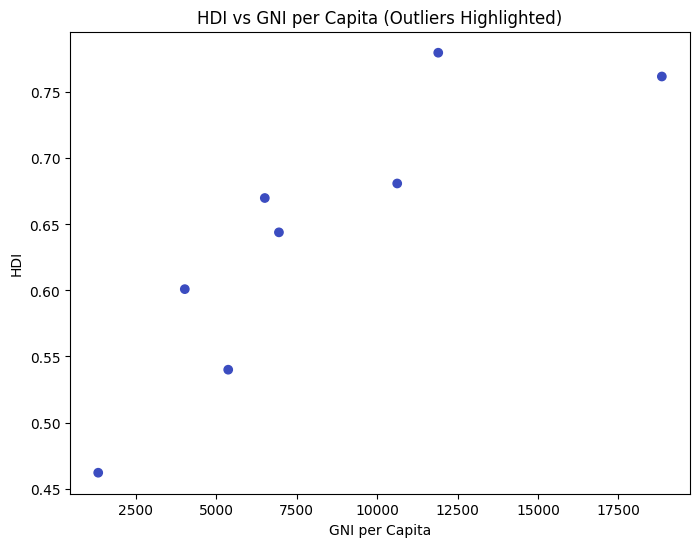

In [57]:
plt.figure(figsize=(8, 6))

plt.scatter(
    south_asia_2022['gross_inc_percap'],
    south_asia_2022['hdi'],
    c=south_asia_2022['outlier'],
    cmap='coolwarm'
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (Outliers Highlighted)")
plt.show()


4. Exploring Metric Relationships:
• Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"}).
• Compute Pearson correlation of each metric with HDI.
• Create scatter plots with trendlines to visualize the relationships.
• Discuss:
– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.

In [80]:
south_asia_rel = south_asia_df.copy()

In [81]:
corr_life = south_asia_rel['life_expectancy'].corr(south_asia_rel['hdi'])
corr_gender = south_asia_rel['gender_development'].corr(south_asia_rel['hdi'])

print(f"Life Expectancy vs HDI: {corr_life:.3f}")
print(f"Gender Development vs HDI: {corr_gender:.3f}")


Life Expectancy vs HDI: 0.939
Gender Development vs HDI: 0.874


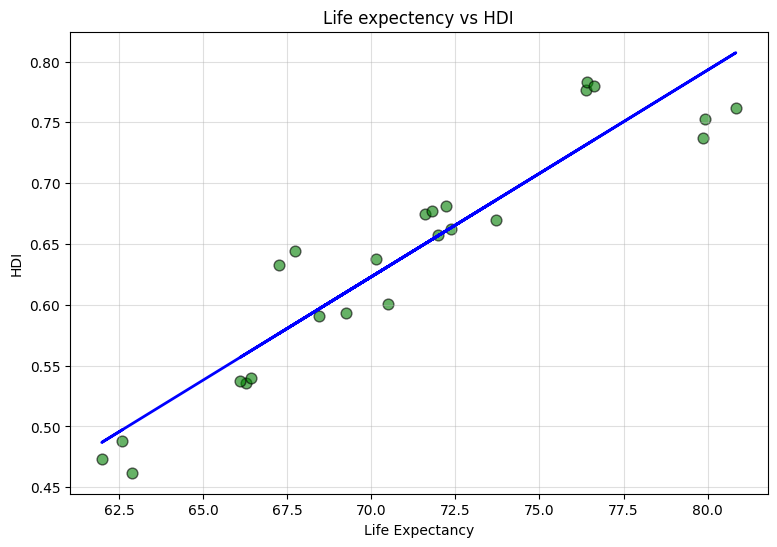

In [82]:
data = south_asia_rel[['life_expectancy', 'hdi']].dropna()

plt.figure(figsize=(9,6))
plt.scatter(data['life_expectancy'], data['hdi'], c='green', s=60, edgecolor='black', alpha=0.6)

plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.title('Life expectency vs HDI')

coeffs = np.polyfit(data['life_expectancy'], data['hdi'], 1)
trend = np.poly1d(coeffs)
plt.plot(data['life_expectancy'], trend(data['life_expectancy']), color='blue', linewidth=2)

plt.grid(alpha=0.4)
plt.show()

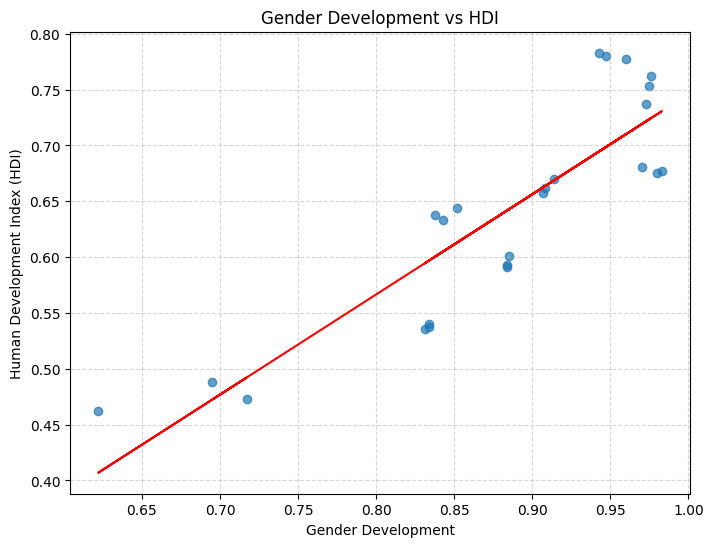

In [86]:
subset = south_asia_rel[['gender_development', 'hdi']].dropna()
plt.figure(figsize=(8,6))
plt.scatter(subset['gender_development'], subset['hdi'], alpha=0.7)
plt.xlabel('Gender Development')
plt.ylabel('Human Development Index (HDI)')
plt.title('Gender Development vs HDI')

z = np.polyfit(subset['gender_development'], subset['hdi'], 1)
p = np.poly1d(z)
plt.plot(subset['gender_development'], p(subset['gender_development']), "r")

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


5. Gap Analysis:
• Create a new metric:

GNI HDI Gap = "gross inc percap" − "hdi"
• Rank South Asian countries by GNI HDI Gap in descending and ascending order.
• Plot the top 3 positive gaps and top 3 negative gaps.
• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

In [95]:
south_asia_2022 = south_asia_df[south_asia_df['year'] == 2022].copy()
south_asia_2022['gni_hdi_gap'] = south_asia_2022['gross_inc_percap'] - south_asia_2022['hdi']
south_asia_2022[['country', 'gross_inc_percap', 'hdi', 'gni_hdi_gap']]

gap_asc = south_asia_2022.sort_values(by='gni_hdi_gap', ascending=True)
gap_asc[['country', 'gross_inc_percap', 'hdi', 'gni_hdi_gap']]

,country,gross_inc_percap,hdi,gni_hdi_gap
32,Afghanistan,1335.205733,0.462,1334.743733
4091,Nepal,4025.554685,0.601,4024.953685
4388,Pakistan,5374.270423,0.540,5373.730423
461,Bangladesh,6511.122178,0.670,6510.452178
2573,India,6950.526798,0.644,6949.882798
659,Bhutan,10624.873880,0.681,10624.192880
5477,Sri Lanka,11899.498470,0.780,11898.718470
3530,Maldives,18846.792190,0.762,18846.030190


In [97]:
gap_desc = south_asia_2022.sort_values(by='gni_hdi_gap', ascending=False)
gap_desc[['country', 'gross_inc_percap', 'hdi', 'gni_hdi_gap']]

,country,gross_inc_percap,hdi,gni_hdi_gap
3530,Maldives,18846.792190,0.762,18846.030190
5477,Sri Lanka,11899.498470,0.780,11898.718470
659,Bhutan,10624.873880,0.681,10624.192880
2573,India,6950.526798,0.644,6949.882798
461,Bangladesh,6511.122178,0.670,6510.452178
4388,Pakistan,5374.270423,0.540,5373.730423
4091,Nepal,4025.554685,0.601,4024.953685
32,Afghanistan,1335.205733,0.462,1334.743733


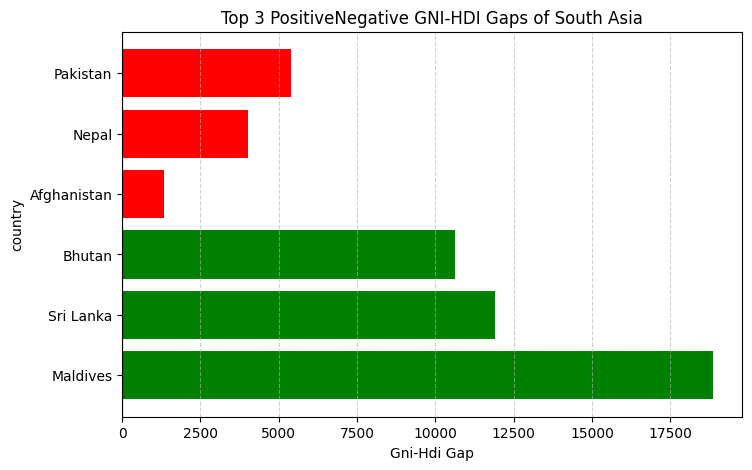

In [103]:
top_positive = gap_desc.head(3)
top_negative = gap_asc.head(3)

plot_data = pd.concat([top_positive, top_negative])

colors = ['green']*len(top_positive) + ['red']*len(top_negative)
plt.figure(figsize=(8,5))
plt.barh(plot_data['country'], plot_data['gni_hdi_gap'], color=colors)
plt.axvline(0, color='black', linewidth=0.8)

plt.xlabel('Gni-Hdi Gap')
plt.ylabel('country')
plt.title('Top 3 PositiveNegative GNI-HDI Gaps of South Asia')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()
